# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 12


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  40 баллов
* Задача 2 &mdash;  60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  20 баллов
* Задача 4 &mdash;  40 баллов







-----

In [1]:
# Bot check

# HW_ID: phds_hw12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category = UserWarning)

Импорты из sklearn:

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

## Задача 1

Реализуйте функции:

- скользящего среднего
- экспоненциального сглаживания
- двойного эскпоненциального сглаживания (метод Хольта)

Визуализируйте результаты работы функций.




### 0. Загрузка данных

#### **Профиль биология**

В этом домашнем задании мы будем работать с данными о сердцебиении человека во время сна. Скачать и изучить подробнее [здесь](https://www.kaggle.com/datasets/jacekmakola/goodnight1).

In [61]:
data = pd.read_csv('hrb_sample_1.csv')
data

,Name,Sport,Date,Start time,Duration,Total distance (km),Average heart rate (bpm),Average speed (km/h),Max speed (km/h),Average pace (min/km),...,Training load,Ascent (m),Descent (m),Notes,Height (cm),Weight (kg),HR max,HR sit,VO2max,Unnamed: 25
0,Jacek Makola,OTHER_INDOOR,03-08-2019,22:53:24,07:50:53,NaN,54,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,182.0,75.0,178.0,55.0,49.0,NaN
1,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,00:00:00,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,00:00:01,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,00:00:02,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28251,NaN,07:50:49,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28252,NaN,07:50:50,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28253,NaN,07:50:51,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28254,NaN,07:50:52,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Формат данных достаточно специфичен. Очистим нашу таблицу от ненужной информации.

In [62]:
data = pd.DataFrame(data.values, columns=data.loc[1])
data = data.drop(0)
data = data.drop(1)
data.tail()

1,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28251,NaN,07:50:49,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28252,NaN,07:50:50,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28253,NaN,07:50:51,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28254,NaN,07:50:52,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28255,NaN,07:50:53,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Уберем лишние колонки.

In [63]:
data = data[['Time', 'HR (bpm)']]

Колонку `Time` преобразуем к правильному типу данных и поставим вместо индексов.

In [64]:
data["Time"] = pd.to_datetime(data['Time'])
data = data.set_index('Time')

Посмотрим, в каком формате хранятся данные о сердцебиении.

In [65]:
type(data['HR (bpm)'][0])

str

Переведите значения `HR (bpm)` к целым числам.

In [66]:
data['HR (bpm)'] = data['HR (bpm)'].astype(int)

Визуализируйте, как изменяется таргет с течением времени. Какие зависимости вы можете увидеть?

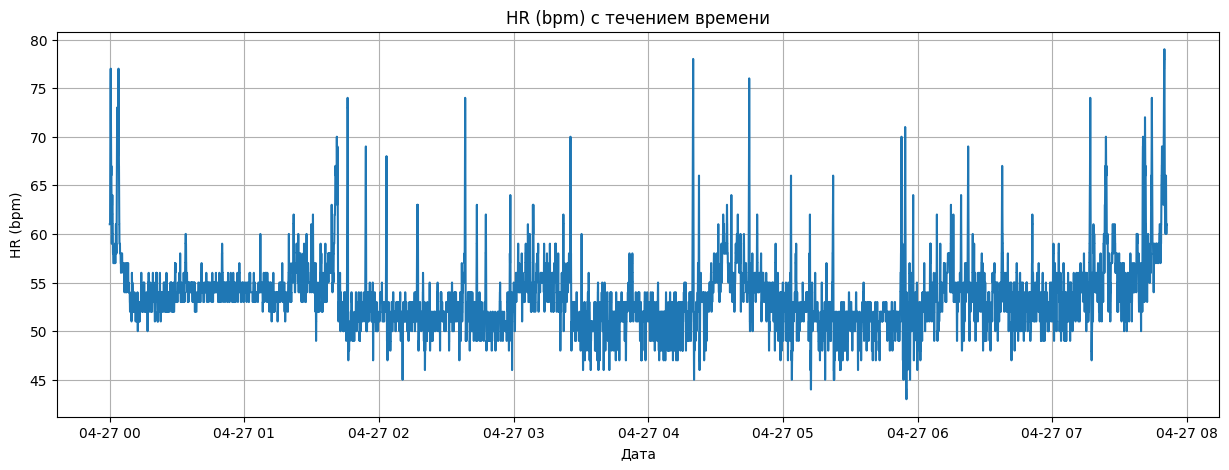

In [67]:
plt.figure(figsize = (15, 5))

plt.plot(data['HR (bpm)'])

plt.title('HR (bpm) с течением времени')
plt.xlabel('Дата')
plt.ylabel('HR (bpm)')

plt.grid()
plt.show()

**На графике можно увидеть:**

1. Периодические пики, которые могут быть связаны с физиологическими процессами, такими как резкие изменения активности или эмоционального состояния во время сна. Эти пики могут представлять собой моменты более интенсивного сердцебиения, например, во время сновидений.

2. Визуально на графике можно заметить некоторый уровень шума, который обусловлен естественными физиологическими колебаниями сердцебиения во время сна. Этот шум может быть вызван различными факторами, такими как дыхание, движения и другие физиологические процессы.

3. Можно заметить общий тренд изменения сердцебиения с течением времени. Например, если сердцебиение начинает резко возрастать или уменьшаться в определенный момент времени, это может быть связано с фазами сна или другими внешними факторами.




### 1. Скользящее среднее

In [68]:
def moving_average(series:pd.Series, n:int)->pd.Series:
    '''
    series:pd.Series - исходные данные
    n:int - величина скользящего окна

    output:pd.Series - сглаженные данные
    '''
    output = series.rolling(n).mean()
    return output

Нарисуйте на одном графике исходные данные и обработанные скользящим средним. Рассмотрите минимум **два** разных `n` и обоснуйте свой выбор этих значений.

*Замечание: при корректной реализации функции первые элементы превратятся в NaN, поэтому рисовать график нужно для `series[n:]`*

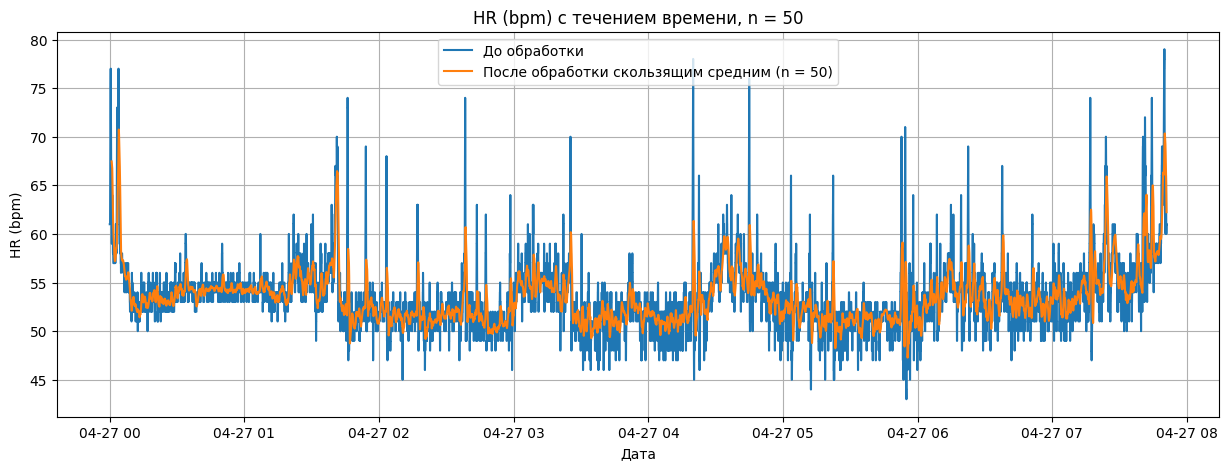

In [69]:
plt.figure(figsize = (15, 5))

plt.plot(data['HR (bpm)'], label = 'До обработки')
plt.plot(moving_average(data['HR (bpm)'], 50)[50:], label = 'После обработки скользящим средним (n = 50)')

plt.title('HR (bpm) с течением времени, n = 50')
plt.xlabel('Дата')
plt.ylabel('HR (bpm)')

plt.legend()
plt.grid()
plt.show()

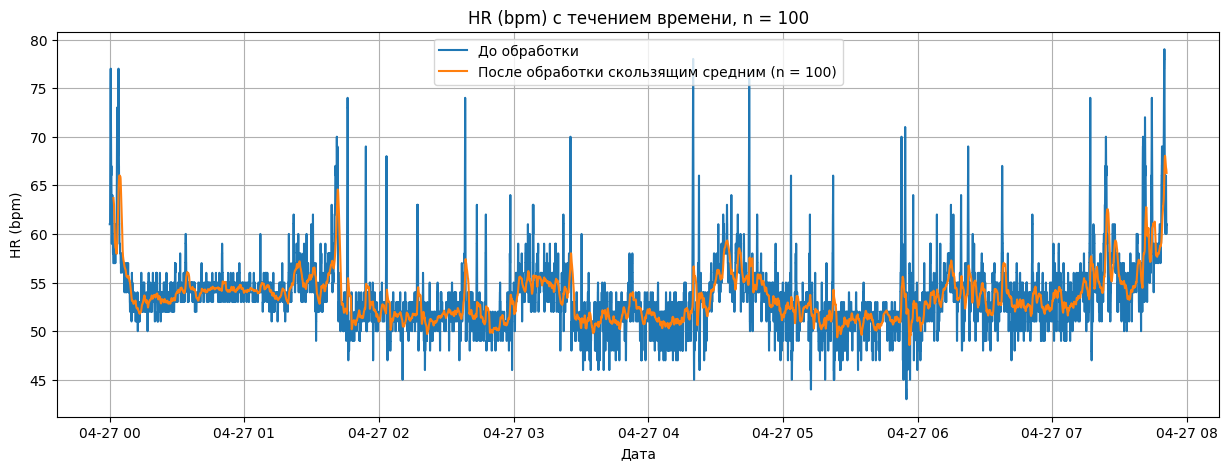

In [70]:
plt.figure(figsize = (15, 5))

plt.plot(data['HR (bpm)'], label = 'До обработки')
plt.plot(moving_average(data['HR (bpm)'], 100)[100:], label = 'После обработки скользящим средним (n = 100)')

plt.title('HR (bpm) с течением времени, n = 100')
plt.xlabel('Дата')
plt.ylabel('HR (bpm)')

plt.legend()
plt.grid()
plt.show()

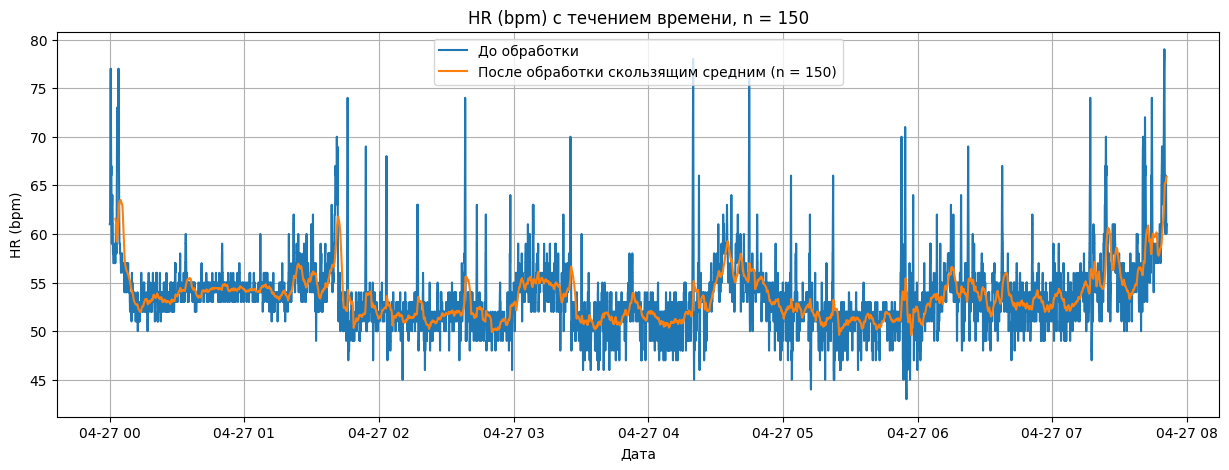

In [71]:
plt.figure(figsize = (15, 5))

plt.plot(data['HR (bpm)'], label = 'До обработки')
plt.plot(moving_average(data['HR (bpm)'], 150)[150:], label = 'После обработки скользящим средним (n = 150)')

plt.title('HR (bpm) с течением времени, n = 150')
plt.xlabel('Дата')
plt.ylabel('HR (bpm)')

plt.legend()
plt.grid()
plt.show()

**Вывод:**

При выборе значения n для скользящего среднего необходимо учитывать баланс между сглаживанием данных и сохранением важных особенностей.

Использование слишком большого значения n может привести к чрезмерному сглаживанию данных, что может скрыть важные временные особенности и детали. Напротив, слишком маленькое значение n может не обеспечить достаточного уровня сглаживания, что приведет к ненужному шуму на графике.

Поэтому, исходя из графиков, оптимальным кажется значение **n = 50**, так как оно обеспечивает достаточное сглаживание данных, сохраняя при этом достаточно высокую чувствительность к временным особенностям.

### 2. Экспоненциальное сглаживание

In [72]:
def exponential_smoothing(series: pd.Series, alpha: float) -> pd.Series:
    '''
    series: pd.Series - исходные данные
    alpha: float - сглаживающий фактор
    '''
    output = np.empty_like(series, dtype=float)
    output[0] = series[0]
    for i in range(1, len(series)):
        output[i] = alpha * series[i] + (1 - alpha) * output[i - 1]

    return pd.Series(output, index=series.index)

Нарисуйте на одном графике исходные данные и обработанные функцией экпоненциального сглаживания. Рассмотрите минимум **два** разных `alpha`. Следите за аккуратностью графика.


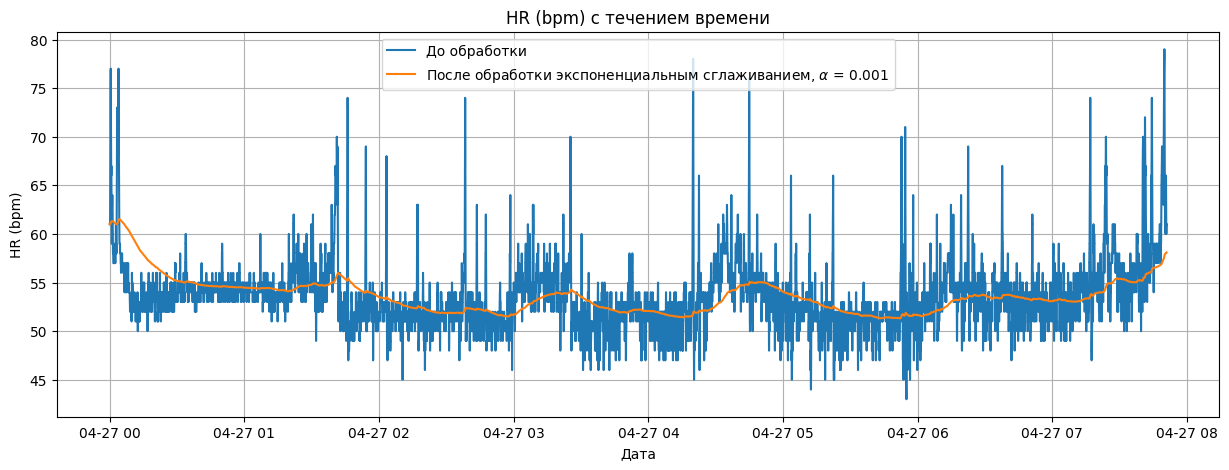

In [73]:
plt.figure(figsize = (15, 5))

plt.plot(data['HR (bpm)'], label = 'До обработки')
plt.plot(exponential_smoothing(data['HR (bpm)'], 0.001), label = r'После обработки экспоненциальным сглаживанием, $\alpha$ = 0.001')

plt.title('HR (bpm) с течением времени')
plt.xlabel('Дата')
plt.ylabel('HR (bpm)')

plt.legend()
plt.grid()
plt.show()

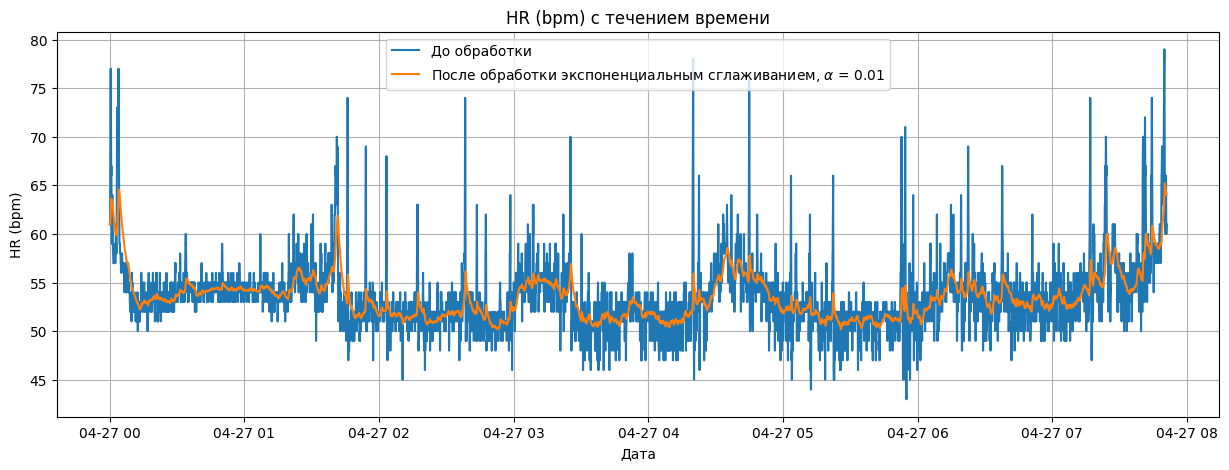

In [74]:
plt.figure(figsize = (15, 5))

plt.plot(data['HR (bpm)'], label = 'До обработки')
plt.plot(exponential_smoothing(data['HR (bpm)'], 0.01), label = r'После обработки экспоненциальным сглаживанием, $\alpha$ = 0.01')

plt.title('HR (bpm) с течением времени')
plt.xlabel('Дата')
plt.ylabel('HR (bpm)')

plt.legend()
plt.grid()
plt.show()

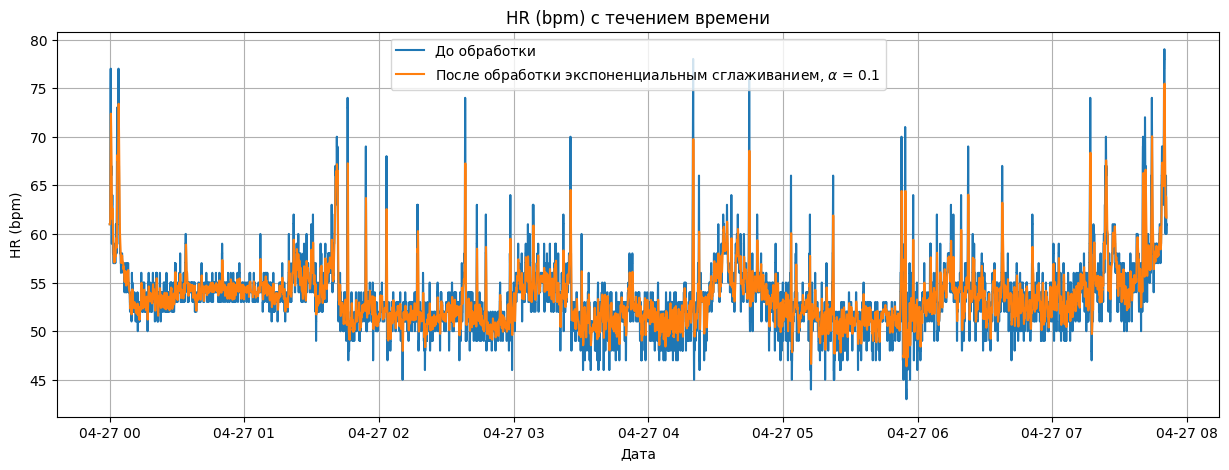

In [75]:
plt.figure(figsize = (15, 5))

plt.plot(data['HR (bpm)'], label = 'До обработки')
plt.plot(exponential_smoothing(data['HR (bpm)'], 0.1), label = r'После обработки экспоненциальным сглаживанием, $\alpha$ = 0.1')

plt.title('HR (bpm) с течением времени')
plt.xlabel('Дата')
plt.ylabel('HR (bpm)')

plt.legend()
plt.grid()
plt.show()

**Вывод:**

При уменьшении значения параметра $\alpha$ данные подвергаются более сильному сглаживанию. Например, для $\alpha = 0.001$ график практически становится горизонтальной линией, что может привести к потере резких изменений и шума в данных. Для значения $\alpha = 0.01$ наблюдается более умеренное сглаживание, при этом сохраняются общие тренды и основные особенности данных. Однако, даже при таком значении $\alpha$ могут сохраняться некоторые шумы и мелкие детали. При использовании $\alpha = 0.1$ данные все еще остаются относительно шумными, что может затруднить анализ и выявление основных трендов из-за сохранения большого количества деталей.

### 3. Двойное экспоненциальное сглаживание (метод Хольта)

In [76]:
def double_exponential_smoothing(series: pd.Series, alpha: float, beta: float) -> pd.Series:
    '''
    series: pd.Series - исходные данные
    alpha: float - коэффициент сглаживания уровня
    beta: float - коэффициент сглаживания тренда
    '''
    output = [series[0]]
    level = series[0]
    trend = series[1] - series[0]

    for n in range(1, len(series) + 1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series):
            value = output[-1]
        else:
            value = series[n]
            last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
            trend = beta * (level - last_level) + (1 - beta) * trend
            output.append(level + trend)

    output = pd.Series(output, index = series.index)
    return output

Нарисуйте на одном графике исходные данные и обработанные функцией двойного экпоненциального сглаживания. Рассмотрите минимум **три** разных пары `alpha` и `beta`. Следите за аккуратностью графика.

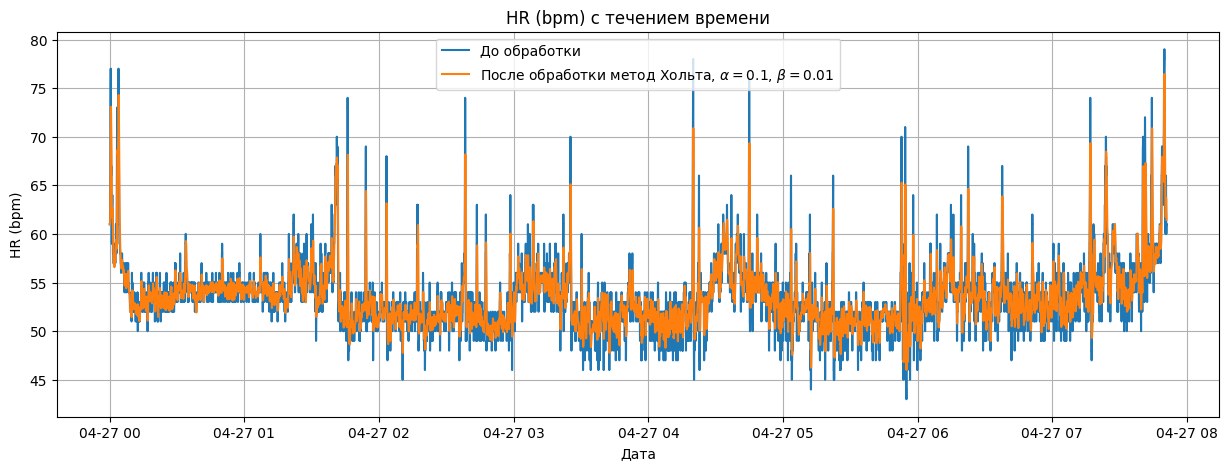

In [77]:
plt.figure(figsize = (15, 5))

plt.plot(data['HR (bpm)'], label = 'До обработки')
plt.plot(double_exponential_smoothing(data['HR (bpm)'], 0.1, 0.01), label = r"После обработки метод Хольта, $\alpha = 0.1$, $\beta = 0.01$")

plt.title('HR (bpm) с течением времени')
plt.xlabel('Дата')
plt.ylabel('HR (bpm)')

plt.legend()
plt.grid()
plt.show()

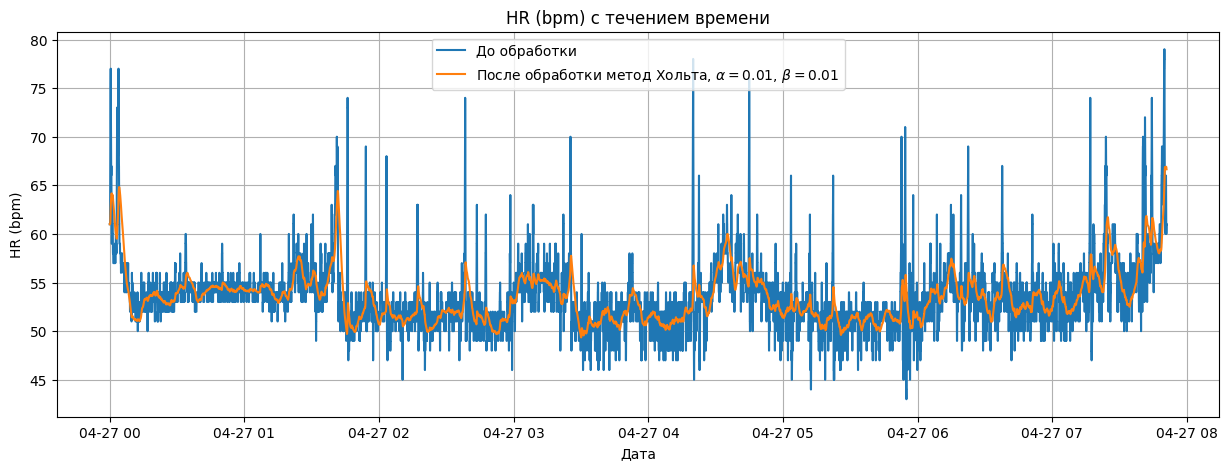

In [78]:
plt.figure(figsize = (15, 5))

plt.plot(data['HR (bpm)'], label = 'До обработки')
plt.plot(double_exponential_smoothing(data['HR (bpm)'], 0.01, 0.01), label = r"После обработки метод Хольта, $\alpha = 0.01$, $\beta = 0.01$")

plt.title('HR (bpm) с течением времени')
plt.xlabel('Дата')
plt.ylabel('HR (bpm)')

plt.legend()
plt.grid()
plt.show()

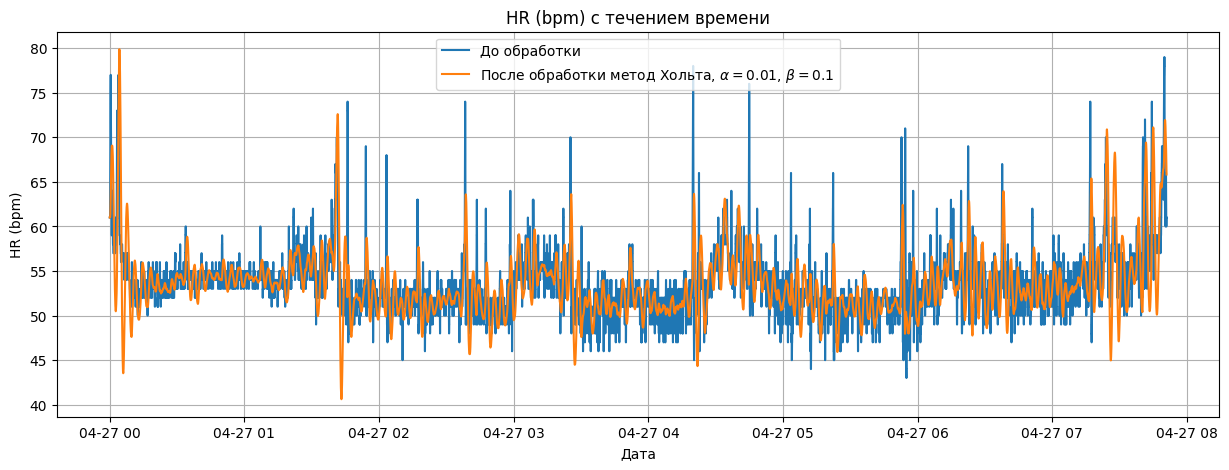

In [79]:
plt.figure(figsize = (15, 5))

plt.plot(data['HR (bpm)'], label = 'До обработки')
plt.plot(double_exponential_smoothing(data['HR (bpm)'], 0.01, 0.1), label = r"После обработки метод Хольта, $\alpha = 0.01$, $\beta = 0.1$")

plt.title('HR (bpm) с течением времени')
plt.xlabel('Дата')
plt.ylabel('HR (bpm)')

plt.legend()
plt.grid()
plt.show()

**Выводы:**

При анализе результатов двойного экспоненциального сглаживания мы обратили внимание на важность выбора оптимальных значений параметров alpha и beta. Видно, что наилучшее приближение к исходным данным наблюдается при $\alpha = 0.1$ и $\beta = 0.01$, что позволило сохранить важные тренды данных, минимизируя при этом уровень шума.

При использовании слишком маленьких значений $\alpha$ и $\beta$, таких как 0.01 для обоих параметров, данные были слишком сильно сглажены, что привело к потере важных трендов и основных особенностей ряда. С другой стороны, слишком большие значения $\alpha$ и $\beta$, например, 0.1 для обоих параметров, могут привести к сохранению слишком большого количества шума в данных и потере важных трендов.

## Задача 2.

Продолжайте работать с выбранными данными. Разбейте их таким образом, чтобы в тесте остались последние 20% измерений.



In [80]:
test_size = int(len(data['HR (bpm)']) * 0.2)

train = data['HR (bpm)'].iloc[:-test_size]
test = data['HR (bpm)'].iloc[-test_size:]

### 1. Baseline

В любой задаче машинного обучения сначала полезно строить простые модели, так называемые `baseline`. Сгенерируйте фичи из даты. Поясните свой выбор.

In [81]:
def create_date_features(date):
    """Создает фичи из даты"""
    row = {}
    row["hour"] = date.hour
    row["minute"] = date.minute
    row["second"] = date.second
    return row

def create_only_date_train_features(y_series):
    """
    Создает обучающий датасет из признаков, полученных из дат для y_series
    """
    time_features = pd.DataFrame(
        [create_date_features(date) for date in y_series.index]
    )
    return time_features, y_series

In [82]:
X_train, y_train = create_only_date_train_features(data)
X_test, y_test = create_only_date_train_features(test)
display(X_train.head())
display(y_train.head())

,hour,minute,second
0,0,0,0
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,4


1,HR (bpm)
Time,
2024-04-27 00:00:00,61
2024-04-27 00:00:01,61
2024-04-27 00:00:02,61
2024-04-27 00:00:03,61
2024-04-27 00:00:04,61


**Ответ:**

Поскольку модели машинного обучения не могут работать непосредственно с форматом даты, мы преобразовали даты из наших данных в более доступный для модели формат, предоставляя ей наиболее подробную информацию о времени в виде часов, минут и секунд.

Таким образом, мы предоставляем модели наибольшую возможность для выявления и анализа временных трендов, что является ключевым аспектом в анализе данных о сердцебиении.

Также мы учли особенности времени, заметив, что в данной задаче меняются не дни, а лишь часы, минуты и секунды. Это помогает модели правильно интерпретировать временные данные и более точно определять временные закономерности и тренды.

Обучите линейную регрессию с регуляризацией и случайный лес на ваших данных.

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = Ridge()
forest = RandomForestRegressor()

lr.fit(X_train_scaled, y_train)
forest.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)
forest_pred = forest.predict(X_test_scaled)

Визуализируйте полученные прогнозы.

In [84]:
def plot_results(y_to_train, y_to_test, y_forecast, model_name):
    """
    Функция для визуализации временного ряда и предсказания.

    Параметры:
        - y_to_train: pd.Series
            Временной ряд, на котором обучалась модель.
        - y_to_test: pd.Series
            Временной ряд, который предсказывает модель.
        - y_forecast: array
            Предсказания модели.
        - plot_conf_int: bool
            Надо ли строить предсказательного интервал.
        - left_bound: array
            Левая граница предсказательного интервала.
        - right_bound: array
            Правая граница предсказательного интервала.
    """

    plt.figure(figsize = (15, 5))

    plt.plot(y_to_train, label = "train")
    plt.plot(y_to_test, label = "test")
    plt.plot(y_to_test.index, y_forecast, label = "prediction")

    plt.title(f'HR (bpm) с течением времени \n {model_name}', fontsize = 15)
    plt.xlabel('Дата')
    plt.ylabel('HR (bpm)')

    plt.legend()
    plt.grid()
    plt.show()

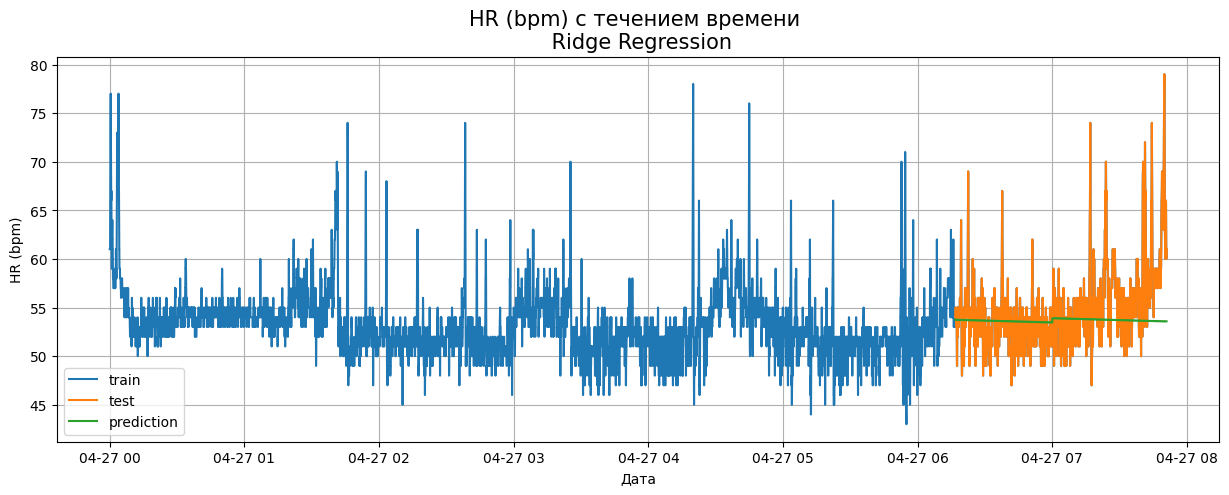

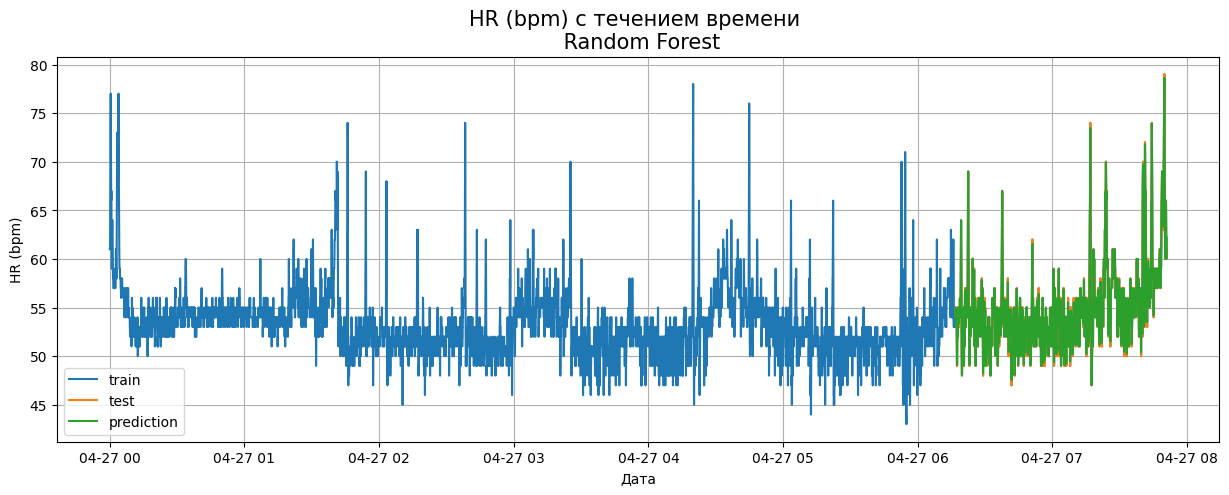

In [85]:
plot_results(y_train, y_test, lr_pred, 'Ridge Regression')
plot_results(y_train, y_test, forest_pred, 'Random Forest')

Посчитайте метрики.

In [86]:
compare_table = None

In [87]:
def add_results_in_comparison_table(
    method: str, y_true, y_forecast
) -> pd.DataFrame:
    """
    Добавляет новую строчку в таблицу compare_table
    с результатами текущей модели.

    Если ранее модель была уже добавлена в таблицу,
    то старая строчка перезапишется на новую.

    Параметры:
    - method: имя модели.
    - y_true: истинные значения.
    - y_forecast: предсказанные значения.
    """

    # Обращаемся к глобальной переменной
    global compare_table

    # Считаем метрики
    result_row = {
        "method": method,
        "MSE": mean_squared_error(y_true=y_true, y_pred=y_forecast),
        "MAE": mean_absolute_error(y_true=y_true, y_pred=y_forecast),
        "MAPE": mean_absolute_percentage_error(
            y_true=y_true, y_pred=y_forecast
        ),
    }

    # Записываем результат в таблицу
    if compare_table is None:
        compare_table = pd.DataFrame([result_row])
    else:
        if method in list(compare_table["method"]):
            compare_table = compare_table[compare_table["method"] != method]

        compare_table = pd.concat([compare_table, pd.DataFrame([result_row])])
        compare_table.index = np.arange(len(compare_table))
    return compare_table

In [88]:
add_results_in_comparison_table('Simple Ridge Regression', y_test, lr_pred)
add_results_in_comparison_table('Simple Random Forest', y_test, forest_pred)

,method,MSE,MAE,MAPE
0,Simple Ridge Regression,17.462911,2.703047,0.046675
1,Simple Random Forest,0.035672,0.130182,0.002379


### 2. Рекурсивная стратегия

Обучите линейную регрессию с регуляризацией и случайный лес используя рекурсивную стратегию.



In [89]:
def recursive_prediction(
    model, test_dates, y_to_train, features_creation_function
):
    """
    Функция для рекурсивного предсказания для дат,
    указанных в test_dates.

    Параметры:
        - model
            МЛ-модель.
        - test_dates
            массив с датами, в которые надо сделать предсказания.
        - features_creation_function
            функция для создания тестовых признаков
    """
    predictions = []
    previous_y = list(y_to_train)

    for date in test_dates:
        row = features_creation_function(date, previous_y)
        curr_test = pd.DataFrame([row])
        curr_prediction = model.predict(curr_test)[0]
        previous_y.append(curr_prediction)
        predictions.append(curr_prediction)
    return np.array(predictions)

In [93]:
ridge = Ridge()
ridge.fit(X_train, y_train)

ridge_pred = recursive_prediction(
    ridge,
    test.index,
    train,
    lambda date, previous_y: create_date_features(date),
)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_pred = recursive_prediction(
    rf,
    test.index,
    train,
    lambda date, previous_y: create_date_features(date),
)

Визуализируйте полученные прогнозы.

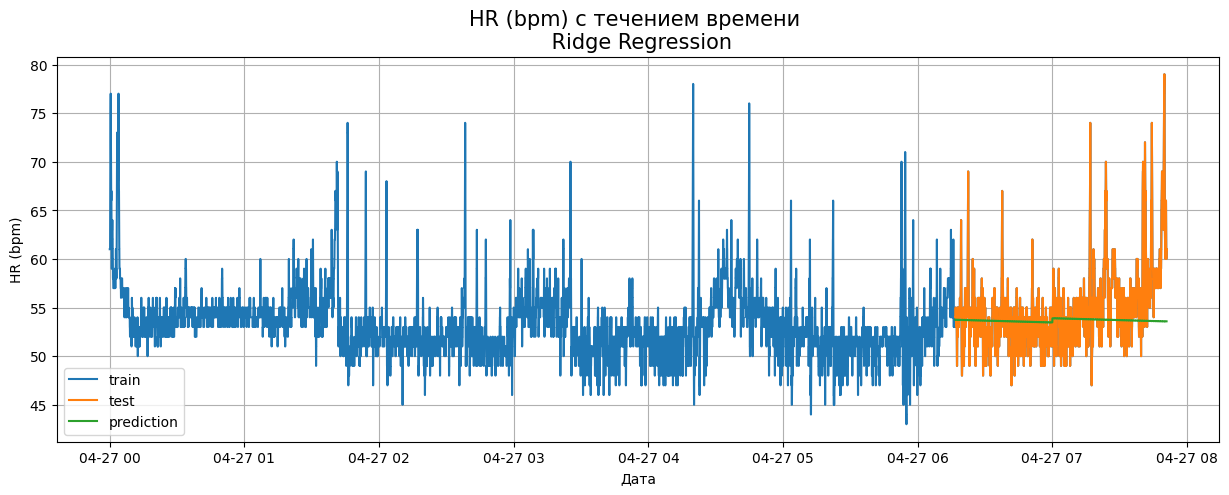

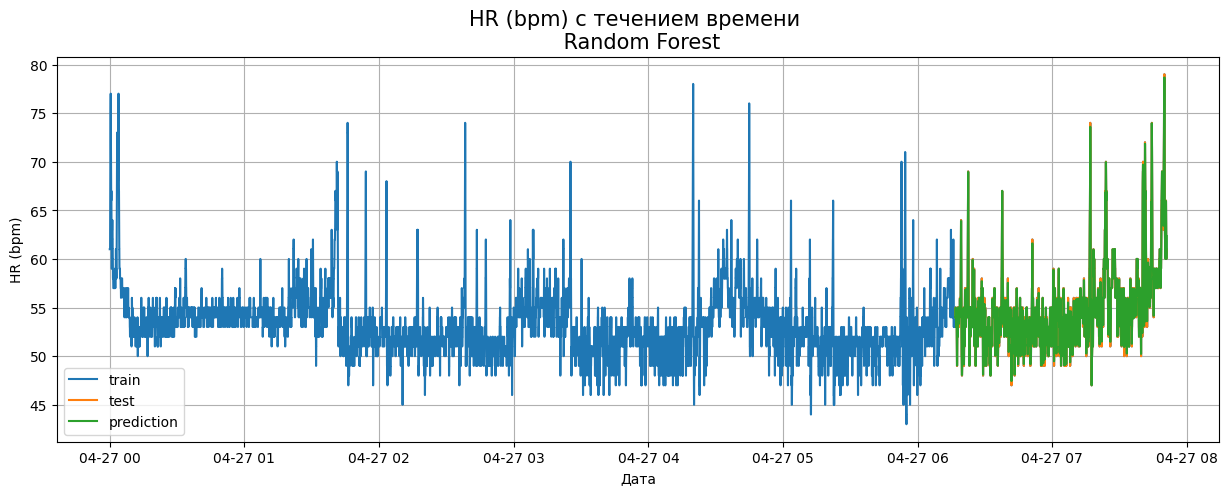

In [94]:
plot_results(y_train, y_test, ridge_pred, 'Ridge Regression')
plot_results(y_train, y_test, rf_pred, 'Random Forest')

Посчитайте метрики.

In [95]:
add_results_in_comparison_table('Recurcive Ridge Regression', y_test, ridge_pred)
add_results_in_comparison_table('Recurcive Random Forest', y_test, rf_pred)

,method,MSE,MAE,MAPE
0,Simple Ridge Regression,17.462911,2.703047,0.046675
1,Simple Random Forest,0.035672,0.130182,0.002379
2,Recurcive Ridge Regression,17.462903,2.703046,0.046675
3,Recurcive Random Forest,0.036833,0.130635,0.002385


### 3. Временные сдвиги

Поработаем еще с признаками. На этот раз добавим сдвиги по времени. Таким образом модель сможет использовать информацию из прошлого, для составления прогноза на будущее. Добавьте новые признаки к вашим данным.

In [97]:
def create_date_and_shifted_train_features(
    y_series, minute_shifts=10, second_shifts=10
):
    """
    Создает обучающий датасет из признаков, полученных из дат
    и значений ряда ранее.
    При этом используются значения ряда со сдвигами
    на неделю и год назад.

    Параметры:
        - y_series
            временной ряд.
        - minute_shifts
            часовой сдвиг.
        - second_shifts
            секундный сдвиг.
    """

    curr_df, y = create_only_date_train_features(y_series)
    curr_df.index = y_series.index

    # применяем сдвиг по минутам
    for shift in range(1, minute_shifts + 1):
        curr_df[f"minute_shift_{shift}"] = y_series.shift(
            shift, axis=0
        )

    # применяем сдвиг по секундам
    for shift in range(1, second_shifts + 1):
        curr_df[f"second_shift_{shift}"] = y_series.shift(
            shift * 60, axis=0
        )

    y = y_series

    # удалим первые строчки с nan
    drop_indices = curr_df.index[curr_df.isna().sum(axis=1) > 0]
    curr_df = curr_df.drop(index=drop_indices)
    y = y.drop(index=drop_indices)
    return curr_df, y

def date_and_shift_features_generator_for_test(date, previous_y):
    """Функция создания признаков из дат исдвигов ряда для тестовых дат"""

    row = create_date_features(date)
    for shift in range(1, MINUTE_SHIFT + 1):
        row[f"minute_shift_{shift}"] = previous_y[-1 * shift]
    for shift in range(1, SECOND_SHIFT + 1):
        row[f"second_shift_{shift}"] = previous_y[-1 * shift * 60]
    return row

Задаим сдвиги:

In [98]:
MINUTE_SHIFT = 5 # минутный сдвиг
SECOND_SHIFT = 15  # секундный сдвиг

Получим новые признаки:

In [99]:
X_train, y_train = create_date_and_shifted_train_features(
    train,
    minute_shifts=MINUTE_SHIFT,
    second_shifts=SECOND_SHIFT,
)

In [100]:
X_train.head(5)

,hour,minute,second,minute_shift_1,minute_shift_2,minute_shift_3,minute_shift_4,minute_shift_5,second_shift_1,second_shift_2,...,second_shift_6,second_shift_7,second_shift_8,second_shift_9,second_shift_10,second_shift_11,second_shift_12,second_shift_13,second_shift_14,second_shift_15
Time,,,,,,,,,,,,,,,,,,,,,
2024-04-27 00:15:00,0,15,0,54.0,54.0,54.0,54.0,53.0,56.0,51.0,...,52.0,56.0,57.0,56.0,56.0,72.0,58.0,57.0,60.0,61.0
2024-04-27 00:15:01,0,15,1,54.0,54.0,54.0,54.0,54.0,56.0,51.0,...,52.0,55.0,56.0,56.0,56.0,71.0,58.0,57.0,61.0,61.0
2024-04-27 00:15:02,0,15,2,55.0,54.0,54.0,54.0,54.0,56.0,51.0,...,52.0,55.0,56.0,56.0,56.0,70.0,58.0,57.0,62.0,61.0
2024-04-27 00:15:03,0,15,3,55.0,55.0,54.0,54.0,54.0,56.0,51.0,...,52.0,55.0,56.0,56.0,57.0,69.0,59.0,57.0,62.0,61.0
2024-04-27 00:15:04,0,15,4,55.0,55.0,55.0,54.0,54.0,56.0,51.0,...,52.0,55.0,56.0,56.0,57.0,69.0,59.0,57.0,63.0,61.0


Обучите линейную регрессию с регуляризацией и случайный лес на обновленном датасете.

In [101]:
shifted_ridge = Ridge()
shifted_random_forest = RandomForestRegressor()

shifted_ridge.fit(X_train, y_train)
shifted_random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [102]:
shifted_ridge_predictions = recursive_prediction(
    shifted_ridge,
    test.index,
    train,
    date_and_shift_features_generator_for_test,
)

shifted_random_forest_predictions = recursive_prediction(
    shifted_random_forest,
    test.index,
    train,
    date_and_shift_features_generator_for_test,
)

Визуализируйте полученные прогнозы.

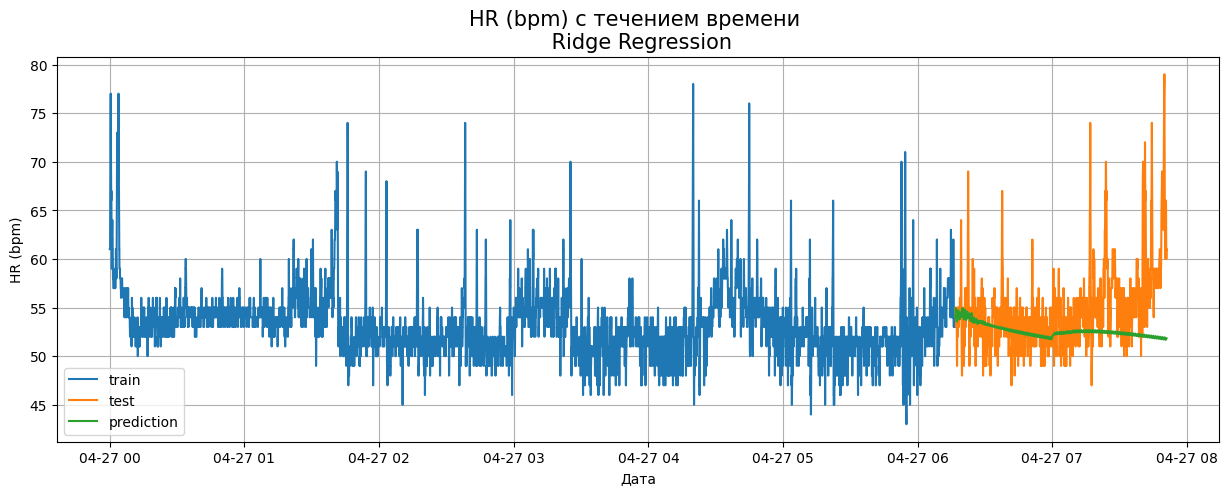

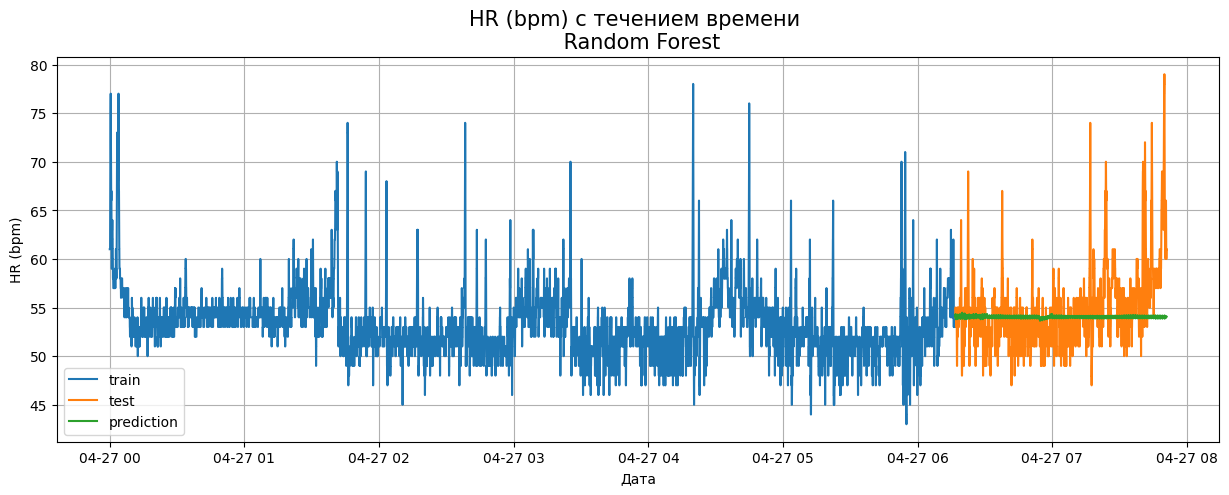

In [103]:
plot_results(train, test, shifted_ridge_predictions, 'Ridge Regression')
plot_results(train, test, shifted_random_forest_predictions, 'Random Forest')

Посчитайте метрики.

In [104]:
add_results_in_comparison_table("Time Shift Ridge", test, shifted_ridge_predictions)
add_results_in_comparison_table("Time Shift Random Forest", test, shifted_random_forest_predictions)

,method,MSE,MAE,MAPE
0,Simple Ridge Regression,17.462911,2.703047,0.046675
1,Simple Random Forest,0.035672,0.130182,0.002379
2,Recurcive Ridge Regression,17.462903,2.703046,0.046675
3,Recurcive Random Forest,0.036833,0.130635,0.002385
4,Time Shift Ridge,22.890702,3.184092,0.054605
5,Time Shift Random Forest,16.671293,2.640547,0.045827


Сделайте выводы по задаче.

**Вывод:**

Исходя из представленных результатов для различных методов моделирования временных рядов, можно сделать следующие выводы:

1. **Простая Ridge регрессия и случайный лес:**

Обе модели показали хорошие результаты по MSE и MAE. Однако случайный лес достиг более низкого значения MSE, что указывает на более точные предсказания этой модели.

2. **Рекурсивное предсказание:**

Использование рекурсивной стратегии предсказания для обеих моделей также показало хорошие результаты, хотя значения MSE и MAE немного выше, чем для простых моделей. Это может быть связано с увеличением ошибки при каждом последующем предсказании из-за накопления ошибок.

3. **Сдвиг во времени:**

Использование метода сдвига во времени привело к ухудшению результатов по сравнению с другими методами. Обе модели показали более высокие значения MSE и MAE, что может быть связано с тем, что модели не учитывают важные временные зависимости в данных.

4. **Выбор модели:**

Наилучшие результаты по MSE и MAE показала модель случайного леса как для простых методов, так и для рекурсивной стратегии. Это указывает на то, что случайный лес может быть более подходящей моделью для данной задачи прогнозирования временных рядов.

5. **Значение MAPE:**

Все модели показали очень низкие значения MAPE, что говорит о хорошей точности предсказаний относительно фактических значений временного ряда.

**Итог:**

Таким образом, на основании анализа результатов, для прогнозирования временных рядов лучше использовать модель случайного леса, особенно при рекурсивном методе предсказания.

## Задача 3.

Используя функции, реализованные в задаче 1, добавьте сглаживание в ваш датасет. Поясните выбор функции сглаживания.

В данном случае выберем скользящее среднее, так как данный метод хорошо работает для уменьшения шума в данных, особенно если в данных присутствуют случайные колебания или выбросы. Оно помогает увидеть общий тренд данных, игнорируя краткосрочные флуктуации. Также при правильном выборе размера окна скользящего среднего мы можем сохранить общий тренд данных, что позволяет нам выявить долгосрочные изменения в сердцебиении человека во времени.

Внесем некие поправки в функции, написанные ранее:

In [131]:
def create_date_shifted_and_rolling_train_features(
    y_series, minute_shifts=2, second_shifts=5
):
    """
    Создает обучающий датасет из признаков, полученных из дат
    и значений ряда ранее.
    Используются занчения ряда со сдвигами на неделю и год назад.
    Также добавлены признаки скользящего среднего.

    Параметры:
        - y_series
            временной ряд.
        - minute_shifts
            минутный сдвиг.
        - second_shifts
            секундный сдвиг.
    """

    curr_df, y = create_date_and_shifted_train_features(
        y_series,
        minute_shifts=minute_shifts,
        second_shifts=second_shifts,
    )

    # Важно! значения скользящего окна надо сдивнуть на 1 вправо,
    # иначе вы будете использовать при обучении текущее значение ряда.
    curr_df["rolling_mean"] = (
        y_series.rolling(minute_shifts, min_periods=1).mean().shift(1, axis=0)
    )
    curr_df["rolling_max"] = (
        y_series.rolling(minute_shifts, min_periods=1).max().shift(1, axis=0)
    )
    curr_df["rolling_min"] = (
        y_series.rolling(minute_shifts, min_periods=1).min().shift(1, axis=0)
    )

    # удалим первые строчки с nan
    drop_indices = curr_df.index[curr_df.isna().sum(axis=1) > 0]
    curr_df = curr_df.drop(index=drop_indices)
    y = y.drop(index=drop_indices)
    return curr_df, y

def date_shifted_and_rolling_features_generator_for_test(date, previous_y):
    """Функция создания признаков из дат и сдвигов ряда для тестовых дат"""
    row = date_and_shift_features_generator_for_test(date, previous_y)
    row["rolling_mean"] = np.mean(previous_y[-MINUTE_SHIFT:])
    row["rolling_max"] = np.max(previous_y[-MINUTE_SHIFT:])
    row["rolling_min"] = np.min(previous_y[-MINUTE_SHIFT:])
    return row

In [132]:
X_train, y_train = create_date_shifted_and_rolling_train_features(
    train,
    minute_shifts = MINUTE_SHIFT,
    second_shifts = SECOND_SHIFT,
)

Обучите линейную регрессию с регуляризацией и случайный лес на обновленном датасете.

In [133]:
ridge = Ridge()
ridge.fit(X_train, y_train)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

Визуализируйте полученные прогнозы.

In [134]:
ridge_pred = recursive_prediction(ridge, test.index, train, date_shifted_and_rolling_features_generator_for_test)
random_forest_pred = recursive_prediction(random_forest, test.index, train, date_shifted_and_rolling_features_generator_for_test)

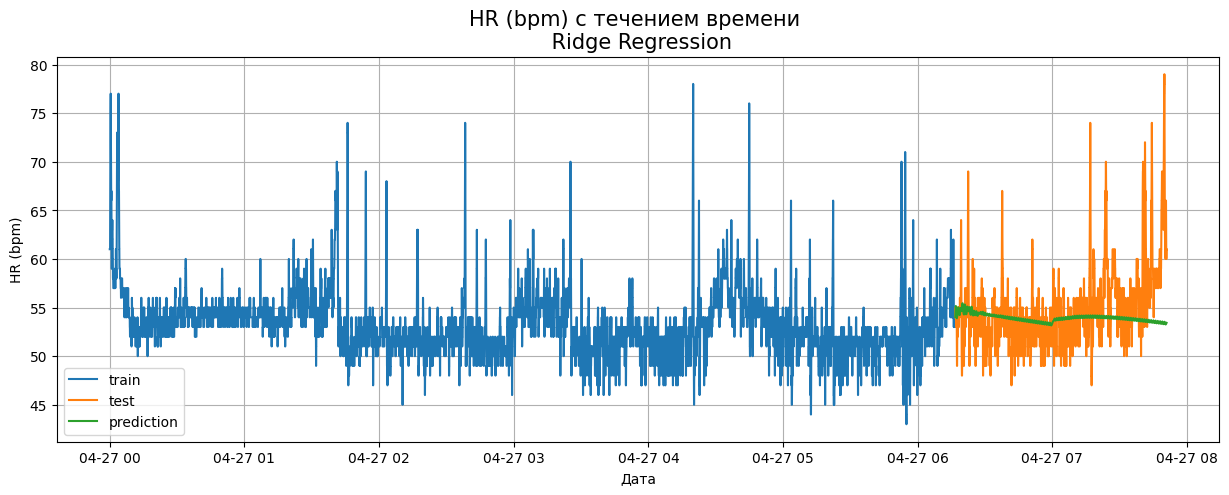

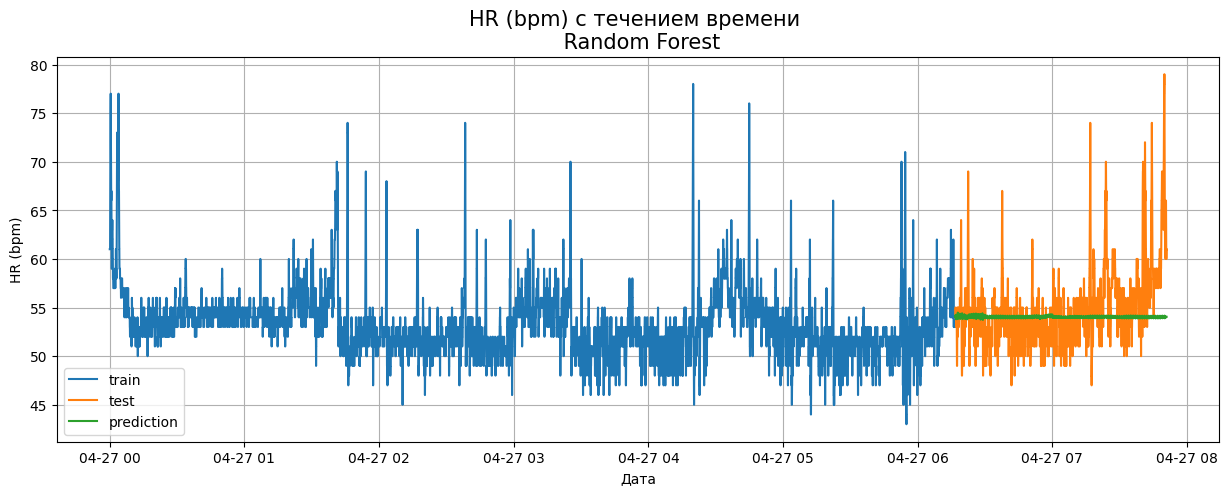

In [135]:
plot_results(train, test, ridge_pred, 'Ridge Regression')
plot_results(train, test, random_forest_pred, 'Random Forest')

Посчитайте метрики.

In [136]:
add_results_in_comparison_table("Ridge with window", test, ridge_pred)
add_results_in_comparison_table("Random Forest with window", test, random_forest_pred)

,method,MSE,MAE,MAPE
0,Simple Ridge Regression,17.462911,2.703047,0.046675
1,Simple Random Forest,0.035672,0.130182,0.002379
2,Recurcive Ridge Regression,17.462903,2.703046,0.046675
3,Recurcive Random Forest,0.036833,0.130635,0.002385
4,Time Shift Ridge,22.890702,3.184092,0.054605
5,Time Shift Random Forest,16.671293,2.640547,0.045827
6,Ridge with window,17.528676,2.705766,0.046865
7,Random Forest with window,16.716756,2.642448,0.045852


**Вывод:**

1. Применение скользящего окна для сглаживания данных в данной задаче временных рядов не привело к значительному улучшению производительности моделей.

2. Модели Ridge и Random Forest, обученные на данных с добавлением скользящего окна, показали незначительное ухудшение по метрикам MAE и MAPE по сравнению с моделями, обученными без использования скользящего окна.

3. Это может указывать на то, что выбранный размер окна или другие параметры скользящего окна могут не быть оптимальными для данной задачи.

## Задача 4.

Вспомним, что при построении деревьев в задаче регрессии для каждого листа вычисляется среднее по всем обучающим объектам, которые попали в данный лист. Тем самым значение в листе лежит в пределах области значений таргета на обучении (не превосходит максимального, не меньше минимального). В связи с этим деревья не могут предсказывать значения за пределами этой области. Зависимости в задачах временных рядов не редко имеют некоторый тренд, например, значения на тестовой части временного ряда могут оказаться вне области значений обучающей части ряда. Это означает, что решающее дерево не сможет построить хороший прогноз временного ряда. Проблема также распространяется на случайный лес.

В данной задаче вы реализуете другой способ прогнозирования временных рядов, который может решить эту проблему.

Исследуйте `Ridge`, `Lasso` и `ElasticNet` с различными параметрами на данных из предыдущей задачи. Подберите лучшую линейную модель.

К решению задачи предлагаю подойти так:

Так как Ridge соответствует ElasticNet при l1_ratio == 0, а Lasso соответсвует ElasticNet при l1_ratio == 1, то давайте исследуем только ElasticNet с изменяющимся параметром l1_ratio от нуля до 1.

Сделаем поиск по сетке, тобы выбрать оптимальную модель.

In [144]:
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}

elasticnet = ElasticNet()

grid_search = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Посчитайте остатки прогноза вашей модели на тренировочной выборке. Остатком является разность истинного значния и спрогнозированного.

In [145]:
best_model.fit(X_train, y_train)
train_predictions = best_model.predict(X_train)
train_residuals = y_train - train_predictions

Теперь сделаем необычный ход &mdash; научим случайный лес предсказывать ошибку линейной модели. Для этого за `Х` возьмем исходные признаки, а за `y` - вектор разностей, который вы посчитали в ячейке выше.

Предскажем ошибку линейной модели на тестовой выборке. Получим вектор предсказанных ошибок.

In [148]:
errors_pred = random_forest.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- HR (bpm)
- Smoothed HR (bpm)
Feature names seen at fit time, yet now missing:
- hour
- minute
- minute_shift_1
- minute_shift_2
- minute_shift_3
- ...


**НЕ УСПЕЛ РАЗОБРАТЬСЯ В ЧЕМ ОШИБКА**

Теперь сложим прогноз линейной модели для тестовой выборки и прогноз ошибок случайного леса для этой же тестовой выборки. Посчитайте метрики для полученного вектора.

In [ ]:
mse_errors = mean_squared_error(train_residuals, errors_pred)
mae_errors = mean_absolute_error(train_residuals, errors_pred)

combined_predictions = test_predictions + errors_pred

mse_combined = mean_squared_error(y_test, combined_predictions)
mae_combined = mean_absolute_error(y_test, combined_predictions)

Визуализируйте новый прогноз.

In [ ]:
<...>

Сделайте вывод.

**Вывод:**<...>

Процедура, которую вы сейчас провели, называется **бустинг**. В этой модели последовательно объединяются деревья, которые учатся предсказывать ошибку предыдущего дерева. Благодаря такой схеме модели удается достичь высокого качества. Подробнее с бустингом мы ознакомимся в следующем семестре.